In [1]:
import os
import pandas as pd

database = 'a5a'


if database == 'CPU_SMALL':
    size_of_dataset = 8192	
elif database == 'abalone':
    size_of_dataset = 4177
elif database == 'Diabetes':
    size_of_dataset = 768
elif database == 'w3a':
    size_of_dataset = 4912
else:
    size_of_dataset = 4912

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'./{database}/plot/'


## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
compute_percent = lambda row: row[n_components_column] / size_of_dataset * 100
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

['Random_Fourier_features_and_SVC_a5a_cv_5.csv', 'Kernel_SVM_a5a_cv_5.csv', 'Kernel_ridge_classification_a5a_cv_5.csv', 'Nystrom_and_ridge_classification_a5a_cv_5.csv', 'Nystrom_and_SVC_a5a_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv']
Ridge files
['Kernel_ridge_classification_a5a_cv_5.csv', 'Nystrom_and_ridge_classification_a5a_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv']
SvM files
['Kernel_SVM_a5a_cv_5.csv', 'Nystrom_and_SVC_a5a_cv_5.csv', 'Random_Fourier_features_and_SVC_a5a_cv_5.csv']


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,damping,File
0,100,6414,0.843883,0.0,2.678229,0.0,0.842844,0.0,0.842844,0.008217,31.508977,Kernel_SVM_a5a_cv_5.csv
1,1,64,0.844915,0.0,1.100656,0.0,0.840662,0.0,0.840662,0.011128,76.764699,Nystrom_and_SVC_a5a_cv_5.csv
2,2,128,0.844686,0.0,1.653459,0.0,0.841285,0.0,0.841285,0.011313,51.085997,Nystrom_and_SVC_a5a_cv_5.csv
3,4,256,0.845298,0.0,3.800252,0.0,0.841128,0.0,0.841128,0.011431,22.243200,Nystrom_and_SVC_a5a_cv_5.csv
4,5,320,0.844380,0.0,5.954019,0.0,0.843311,0.0,0.843311,0.010369,14.181679,Nystrom_and_SVC_a5a_cv_5.csv
5,7,448,0.845374,0.0,8.053013,0.0,0.843935,0.0,0.843935,0.010948,10.497614,Nystrom_and_SVC_a5a_cv_5.csv
6,9,577,0.844150,0.0,9.708082,0.0,0.843467,0.0,0.843467,0.008852,8.695337,Nystrom_and_SVC_a5a_cv_5.csv
7,10,641,0.844533,0.0,10.803164,0.0,0.842688,0.0,0.842688,0.008924,7.817459,Nystrom_and_SVC_a5a_cv_5.csv
8,12,769,0.844954,0.0,13.108949,0.0,0.843155,0.0,0.843155,0.009635,6.445624,Nystrom_and_SVC_a5a_cv_5.csv
9,13,833,0.844724,0.0,11.313025,0.0,0.844091,0.0,0.844091,0.009459,7.466828,Nystrom_and_SVC_a5a_cv_5.csv


In [2]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [3]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
9,Nystrom_and_ridge_classification_a5a_cv_5.csv,16.958,0.846,833
4,Nystrom_and_ridge_classification_a5a_cv_5.csv,6.515,0.846,320
6,Nystrom_and_ridge_classification_a5a_cv_5.csv,11.747,0.846,577
16,Nystrom_and_ridge_classification_a5a_cv_5.csv,32.634,0.845,1603
21,Random_Fourier_features_and_ridge_classificati...,9.121,0.845,448
1,Nystrom_and_ridge_classification_a5a_cv_5.csv,1.303,0.845,64
14,Nystrom_and_ridge_classification_a5a_cv_5.csv,27.402,0.845,1346
13,Nystrom_and_ridge_classification_a5a_cv_5.csv,26.099,0.845,1282
11,Nystrom_and_ridge_classification_a5a_cv_5.csv,22.191,0.845,1090
32,Random_Fourier_features_and_ridge_classificati...,32.634,0.845,1603


# Damping

In [4]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
17,Random_Fourier_features_and_ridge_classificati...,1.303,953.242,64
18,Random_Fourier_features_and_ridge_classificati...,2.606,730.483,128
1,Nystrom_and_ridge_classification_a5a_cv_5.csv,1.303,619.611,64
2,Nystrom_and_ridge_classification_a5a_cv_5.csv,2.606,456.731,128
19,Random_Fourier_features_and_ridge_classificati...,5.212,452.730,256
20,Random_Fourier_features_and_ridge_classificati...,6.515,380.346,320
4,Nystrom_and_ridge_classification_a5a_cv_5.csv,6.515,309.438,320
21,Random_Fourier_features_and_ridge_classificati...,9.121,272.349,448
3,Nystrom_and_ridge_classification_a5a_cv_5.csv,5.212,270.755,256
22,Random_Fourier_features_and_ridge_classificati...,11.747,188.417,577


# Plotting 
## Ridge

In [1]:
from plotting import view_plots_and_save_them


columns = [score_column, time_column, damping_column ]
  
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names, type ='ridge',
                          columns=columns, database=database, plot_path = plot_path)

NameError: name 'score_column' is not defined

## SVM 

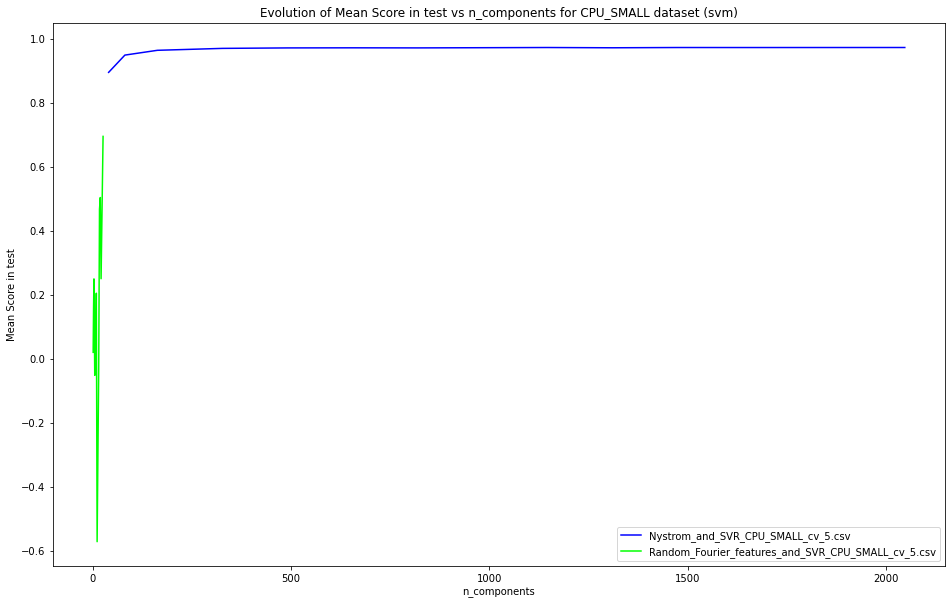

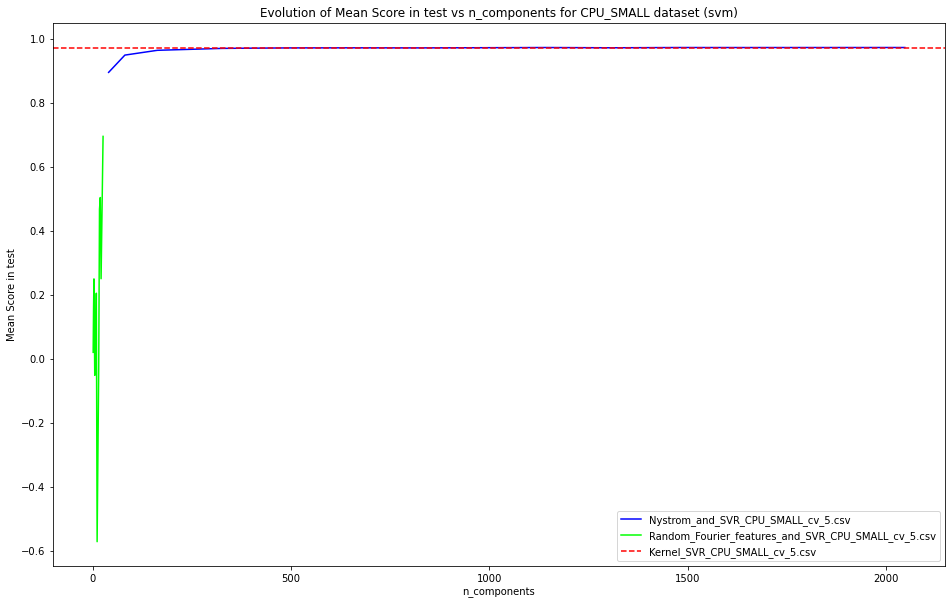

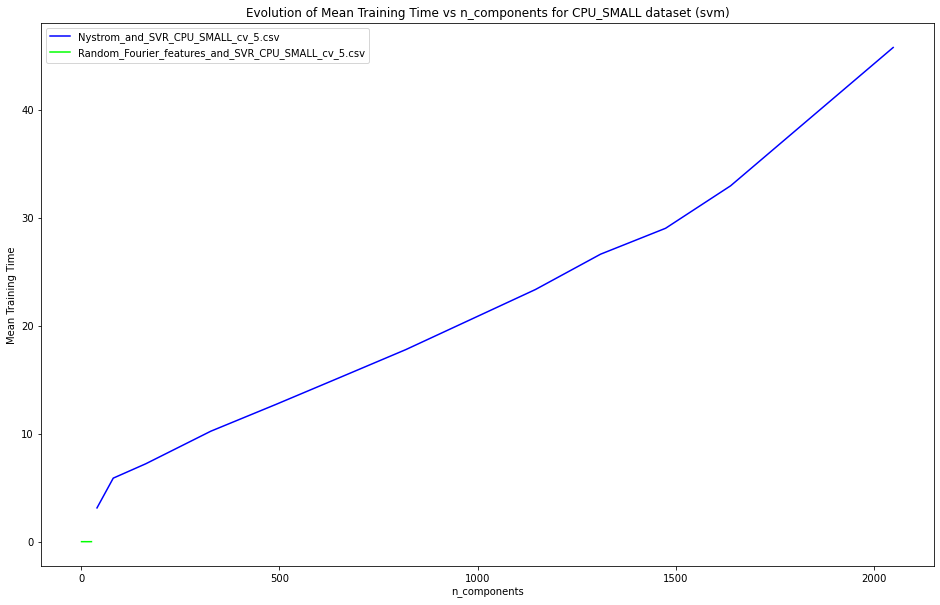

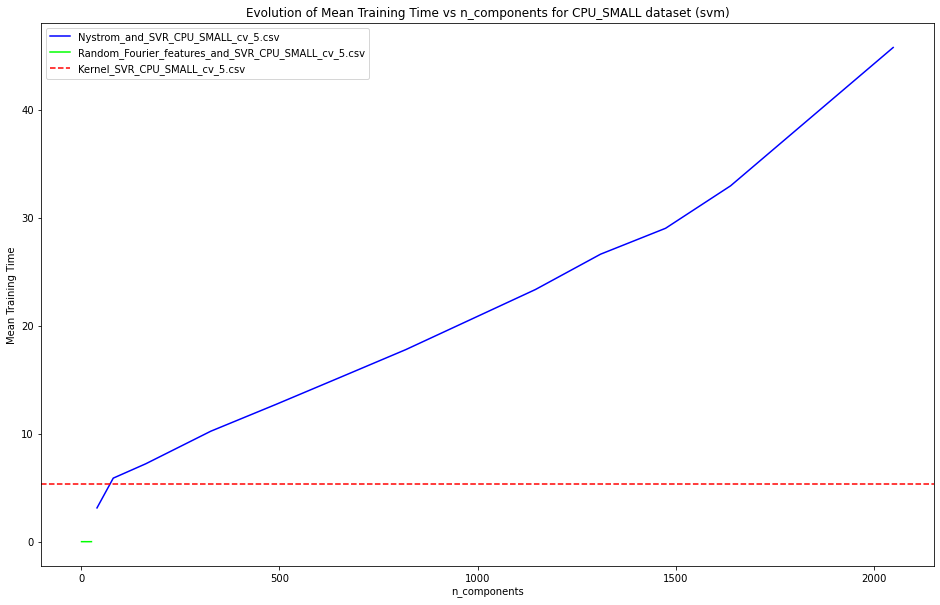

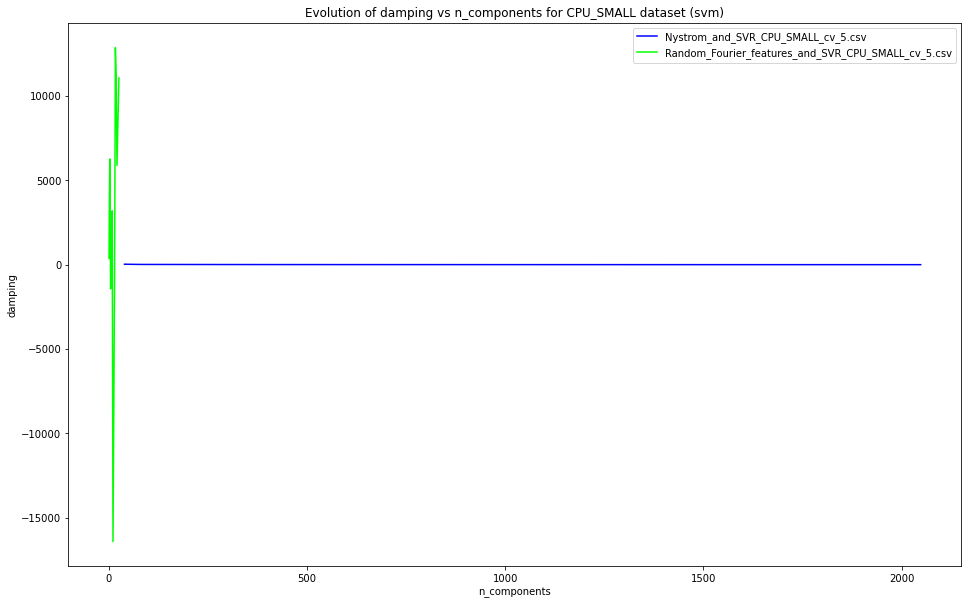

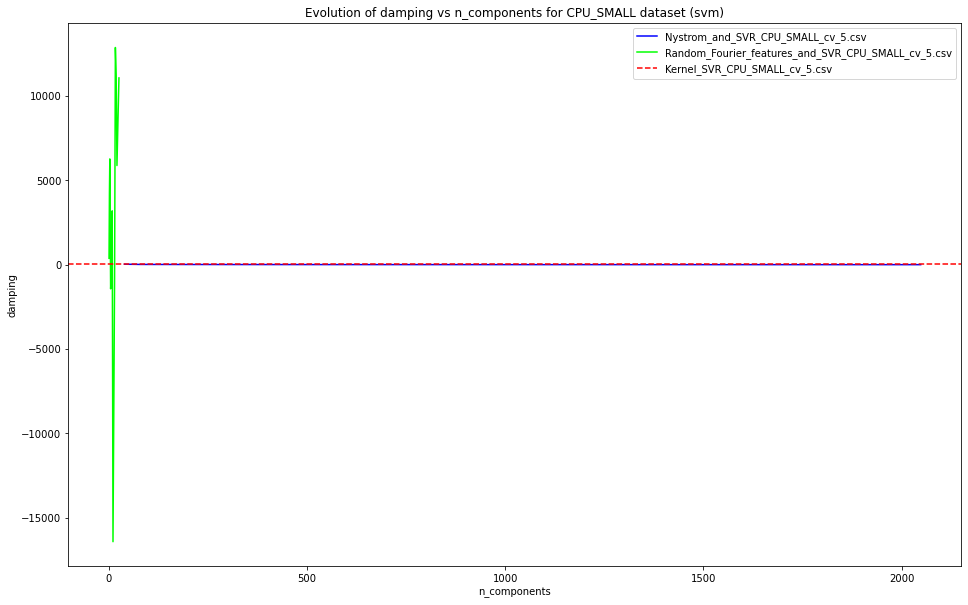

In [ ]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names, type ='svm',
                          columns=columns, database=database, plot_path = plot_path)

# Hyperparameter

In [ ]:
print(show_verbose(svm_data_verbose, n_rows = 20))

                                                                                                Best Parameters  \
0                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.010416666666666666}   
2                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.010416666666666666}   
3                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.010416666666666666}   
1                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.010416666666666666}   
48                             {'regressor__nystroem__gamma': 0.010416666666666666, 'regressor__svm__C': 100.0}   
..                                                                                                          ...   
58             {'regressor__fourier_random_features__gamma': 0.0039471785586208275, 'regressor__svm__C': 100.0}   
55             {'regressor__fourier_random_features__gamma': 0.00394717855862082